In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("crime_dataset_india.csv")
# Drop null values in City/Crime Description
df = df.dropna(subset=['City', 'Crime Description'])
df = df.drop(columns=['Crime Code'])
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN
3,4,01-01-2020 05:00,01-01-2020 03:00,01-01-2020 14:46,Pune,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020 05:00
4,5,01-01-2020 21:00,01-01-2020 04:00,01-01-2020 16:51,Pune,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020 21:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,01-08-2024 16:00,07-31-2024 03:00,31-07-2024 05:05,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaN
40156,40157,31-07-2024 14:00,07-31-2024 04:00,31-07-2024 04:14,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,29-09-2024 14:00
40157,40158,02-08-2024 03:00,07-31-2024 05:00,31-07-2024 21:33,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaN
40158,40159,01-08-2024 19:00,07-31-2024 06:00,31-07-2024 11:05,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaN


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Description   40160 non-null  object
 6   Victim Age          40160 non-null  int64 
 7   Victim Gender       40160 non-null  object
 8   Weapon Used         34370 non-null  object
 9   Crime Domain        40160 non-null  object
 10  Police Deployed     40160 non-null  int64 
 11  Case Closed         40160 non-null  object
 12  Date Case Closed    20062 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.0+ MB


In [223]:
df['Date Reported'] = pd.to_datetime(df['Date Reported'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], format='%m-%d-%Y %H:%M', errors='coerce', dayfirst=True)
df['Time of Occurrence'] = pd.to_datetime(df['Time of Occurrence'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)
df['Date Case Closed'] = pd.to_datetime(df['Date Case Closed'], format='%d-%m-%Y %H:%M', errors='coerce', dayfirst=True)
df['Date of Occurrence'] = df['Date of Occurrence'].dt.date   # only date
df['Time of Occurrence'] = df['Time of Occurrence'].dt.time   # only time

df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,2020-01-02 00:00:00,2020-01-01,01:11:00,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT
1,2,2020-01-01 19:00:00,2020-01-01,06:26:00,Chennai,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT
2,3,2020-01-02 05:00:00,2020-01-01,14:30:00,Ludhiana,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT
3,4,2020-01-01 05:00:00,2020-01-01,14:46:00,Pune,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00
4,5,2020-01-01 21:00:00,2020-01-01,16:51:00,Pune,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31,05:05:00,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT
40156,40157,2024-07-31 14:00:00,2024-07-31,04:14:00,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00
40157,40158,2024-08-02 03:00:00,2024-07-31,21:33:00,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT
40158,40159,2024-08-01 19:00:00,2024-07-31,11:05:00,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT


In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Report Number       40160 non-null  int64         
 1   Date Reported       40160 non-null  datetime64[ns]
 2   Date of Occurrence  40160 non-null  object        
 3   Time of Occurrence  40160 non-null  object        
 4   City                40160 non-null  object        
 5   Crime Description   40160 non-null  object        
 6   Victim Age          40160 non-null  int64         
 7   Victim Gender       40160 non-null  object        
 8   Weapon Used         34370 non-null  object        
 9   Crime Domain        40160 non-null  object        
 10  Police Deployed     40160 non-null  int64         
 11  Case Closed         40160 non-null  object        
 12  Date Case Closed    20062 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(8)
memo

In [225]:

# Step 1: Try parsing with dayfirst=True
date_parsed = pd.to_datetime(df['Date of Occurrence'], errors='coerce', dayfirst=True)

# Step 2: For rows that failed (NaT), try dayfirst=False
mask = date_parsed.isna()
date_parsed[mask] = pd.to_datetime(df.loc[mask, 'Date of Occurrence'], errors='coerce', dayfirst=False)

# Step 3: Assign back to the dataframe
df['Date of Occurrence'] = date_parsed



In [226]:
# Step 5: Now extract Year safely
df['Year'] = df['Date of Occurrence'].dt.year
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year
0,1,2020-01-02 00:00:00,2020-01-01,01:11:00,Ahmedabad,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaT,2020
1,2,2020-01-01 19:00:00,2020-01-01,06:26:00,Chennai,HOMICIDE,37,M,Poison,Other Crime,9,No,NaT,2020
2,3,2020-01-02 05:00:00,2020-01-01,14:30:00,Ludhiana,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaT,2020
3,4,2020-01-01 05:00:00,2020-01-01,14:46:00,Pune,BURGLARY,49,F,Firearm,Other Crime,1,Yes,2020-04-29 05:00:00,2020
4,5,2020-01-01 21:00:00,2020-01-01,16:51:00,Pune,VANDALISM,30,F,Other,Other Crime,18,Yes,2020-01-08 21:00:00,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31,05:05:00,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT,2024
40156,40157,2024-07-31 14:00:00,2024-07-31,04:14:00,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00,2024
40157,40158,2024-08-02 03:00:00,2024-07-31,21:33:00,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT,2024
40158,40159,2024-08-01 19:00:00,2024-07-31,11:05:00,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT,2024


In [227]:
print("Most recent year:", df["Year"].max())

Most recent year: 2024


In [228]:
# Step 6: Keep only 2021-2024
df = df[df['Year'].isin([2022, 2023, 2024])]

print("Shape:", df.shape)


Shape: (22616, 14)


In [229]:
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year
17544,17545,2022-01-01 11:00:00,2022-01-01,15:06:00,Lucknow,VEHICLE - STOLEN,65,M,NaN,Violent Crime,4,Yes,2022-02-27 11:00:00,2022
17545,17546,2022-01-03 22:00:00,2022-01-01,23:44:00,Hyderabad,VEHICLE - STOLEN,71,M,NaN,Violent Crime,11,Yes,2022-01-15 22:00:00,2022
17546,17547,2022-01-03 07:00:00,2022-01-01,08:30:00,Kanpur,PUBLIC INTOXICATION,52,M,Other,Other Crime,14,Yes,2022-01-11 07:00:00,2022
17547,17548,2022-01-01 23:00:00,2022-01-01,01:56:00,Delhi,FRAUD,77,X,Explosives,Other Crime,6,No,NaT,2022
17548,17549,2022-01-03 08:00:00,2022-01-01,07:00:00,Patna,FIREARM OFFENSE,44,F,Blunt Object,Fire Accident,8,Yes,2022-02-09 08:00:00,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31,05:05:00,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT,2024
40156,40157,2024-07-31 14:00:00,2024-07-31,04:14:00,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00,2024
40157,40158,2024-08-02 03:00:00,2024-07-31,21:33:00,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT,2024
40158,40159,2024-08-01 19:00:00,2024-07-31,11:05:00,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT,2024


In [230]:
city_crimes = df.groupby("City", as_index=False).size()
city_crimes.columns = ["City", "Total_Crimes"]

# Find safest city
safest_city = city_crimes.sort_values("Total_Crimes").head(1)
print("Safest city is:", safest_city)


Safest city is:       City  Total_Crimes
22  Rajkot           193


In [231]:
city_crimes

,City,Total_Crimes
0,Agra,431
1,Ahmedabad,984
2,Bangalore,2023
3,Bhopal,390
4,Chennai,1417
5,Delhi,3014
6,Faridabad,207
7,Ghaziabad,390
8,Hyderabad,1594
9,Indore,380


In [232]:
# Count occurrences of each crime type per city
crime_counts = df.groupby(['City', 'Crime Description']).size().reset_index(name='Count')

In [233]:
df["City"].unique()

array(['Lucknow', 'Hyderabad', 'Kanpur', 'Delhi', 'Patna', 'Bangalore',
       'Ludhiana', 'Vasai', 'Chennai', 'Nagpur', 'Indore', 'Mumbai',
       'Surat', 'Visakhapatnam', 'Agra', 'Kolkata', 'Bhopal', 'Varanasi',
       'Ahmedabad', 'Srinagar', 'Nashik', 'Faridabad', 'Jaipur', 'Pune',
       'Ghaziabad', 'Meerut', 'Rajkot', 'Thane', 'Kalyan'], dtype=object)

In [234]:
# Example mapping (you can expand it to all cities)
city_to_state = {
    'Lucknow': 'Uttar Pradesh',
    'Kanpur': 'Uttar Pradesh',
    'Ghaziabad': 'Uttar Pradesh',
    'Meerut': 'Uttar Pradesh',
    'Delhi': 'Delhi',
    'Patna': 'Bihar',
    'Bangalore': 'Karnataka',
    'Hyderabad': 'Telangana',
    'Chennai': 'Tamil Nadu',
    'Mumbai': 'Maharashtra',
    'Pune': 'Maharashtra',
    'Thane': 'Maharashtra',
    'Kalyan': 'Maharashtra',
    'Ahmedabad': 'Gujarat',
    'Rajkot': 'Gujarat',
    'Lucknow': 'Uttar Pradesh',
    'Varanasi': 'Uttar Pradesh',
    'Agra': 'Uttar Pradesh',
    'Indore': 'Madhya Pradesh',
    'Bhopal': 'Madhya Pradesh',
    'Visakhapatnam': 'Andhra Pradesh',
    'Srinagar': 'Jammu & Kashmir',
    'Jaipur': 'Rajasthan',
    'Surat': 'Gujarat',
    'Ludhiana': 'Punjab',
    'Nashik': 'Maharashtra',
    'Nagpur': 'Maharashtra',
    'Kolkata': 'West Bengal',
}

# Map city to state
df['State'] = df['City'].map(city_to_state)


C:\Users\rishi\AppData\Local\Temp\ipykernel_21296\3646904872.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['City'].map(city_to_state)


In [235]:
df

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Year,State
17544,17545,2022-01-01 11:00:00,2022-01-01,15:06:00,Lucknow,VEHICLE - STOLEN,65,M,NaN,Violent Crime,4,Yes,2022-02-27 11:00:00,2022,Uttar Pradesh
17545,17546,2022-01-03 22:00:00,2022-01-01,23:44:00,Hyderabad,VEHICLE - STOLEN,71,M,NaN,Violent Crime,11,Yes,2022-01-15 22:00:00,2022,Telangana
17546,17547,2022-01-03 07:00:00,2022-01-01,08:30:00,Kanpur,PUBLIC INTOXICATION,52,M,Other,Other Crime,14,Yes,2022-01-11 07:00:00,2022,Uttar Pradesh
17547,17548,2022-01-01 23:00:00,2022-01-01,01:56:00,Delhi,FRAUD,77,X,Explosives,Other Crime,6,No,NaT,2022,Delhi
17548,17549,2022-01-03 08:00:00,2022-01-01,07:00:00,Patna,FIREARM OFFENSE,44,F,Blunt Object,Fire Accident,8,Yes,2022-02-09 08:00:00,2022,Bihar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40155,40156,2024-08-01 16:00:00,2024-07-31,05:05:00,Kolkata,COUNTERFEITING,78,F,Firearm,Other Crime,12,No,NaT,2024,West Bengal
40156,40157,2024-07-31 14:00:00,2024-07-31,04:14:00,Mumbai,ILLEGAL POSSESSION,75,F,NaN,Other Crime,2,Yes,2024-09-29 14:00:00,2024,Maharashtra
40157,40158,2024-08-02 03:00:00,2024-07-31,21:33:00,Kanpur,VEHICLE - STOLEN,68,M,Other,Violent Crime,6,No,NaT,2024,Uttar Pradesh
40158,40159,2024-08-01 19:00:00,2024-07-31,11:05:00,Patna,SEXUAL ASSAULT,11,M,Blunt Object,Violent Crime,1,No,NaT,2024,Bihar


# Step 2: Compute total crimes per city

In [236]:
# Group by City + State to sum total crimes (or count rows if each row is a crime)
crime_summary = df.groupby(['State', 'City']).size().reset_index(name='Total_Crimes')

# Optional: sort within each state
crime_summary = crime_summary.sort_values(['State','Total_Crimes'], ascending=[True, True])


In [237]:
crime_summary

,State,City,Total_Crimes
0,Andhra Pradesh,Visakhapatnam,410
1,Bihar,Patna,389
2,Delhi,Delhi,3014
4,Gujarat,Rajkot,193
5,Gujarat,Surat,638
3,Gujarat,Ahmedabad,984
6,Jammu & Kashmir,Srinagar,207
7,Karnataka,Bangalore,2023
9,Madhya Pradesh,Indore,380
8,Madhya Pradesh,Bhopal,390


# Step 3: Get 5 safest cities per state

In [238]:
# Take top 5 cities with least crimes per state
safest_cities_per_state = crime_summary.groupby('State').head(5)
print(safest_cities_per_state)


              State           City  Total_Crimes
0    Andhra Pradesh  Visakhapatnam           410
1             Bihar          Patna           389
2             Delhi          Delhi          3014
4           Gujarat         Rajkot           193
5           Gujarat          Surat           638
3           Gujarat      Ahmedabad           984
6   Jammu & Kashmir       Srinagar           207
7         Karnataka      Bangalore          2023
9    Madhya Pradesh         Indore           380
8    Madhya Pradesh         Bhopal           390
10      Maharashtra         Kalyan           205
13      Maharashtra         Nashik           217
15      Maharashtra          Thane           387
12      Maharashtra         Nagpur           611
14      Maharashtra           Pune          1261
16           Punjab       Ludhiana           430
17        Rajasthan         Jaipur           795
18       Tamil Nadu        Chennai          1417
19        Telangana      Hyderabad          1594
25    Uttar Pradesh 

# Step 4: Add Majority Crime per City

In [239]:
# Count crime type per city
crime_counts = df.groupby(['City', 'Crime Description']).size().reset_index(name='Count')

# Get majority crime per city
majority_crimes = crime_counts.loc[crime_counts.groupby('City')['Count'].idxmax()]
majority_crimes = majority_crimes.rename(columns={'Crime Description':'Majority_Crime', 'Count':'Crime_Count'})

# Merge with safest cities
safest_cities_per_state = safest_cities_per_state.merge(majority_crimes[['City','Majority_Crime','Crime_Count']], on='City', how='left')


In [240]:
safest_cities_per_state

,State,City,Total_Crimes,Majority_Crime,Crime_Count
0,Andhra Pradesh,Visakhapatnam,410,IDENTITY THEFT,29
1,Bihar,Patna,389,SEXUAL ASSAULT,26
2,Delhi,Delhi,3014,DRUG OFFENSE,172
3,Gujarat,Rajkot,193,TRAFFIC VIOLATION,14
4,Gujarat,Surat,638,TRAFFIC VIOLATION,44
5,Gujarat,Ahmedabad,984,ASSAULT,75
6,Jammu & Kashmir,Srinagar,207,BURGLARY,15
7,Karnataka,Bangalore,2023,EXTORTION,119
8,Madhya Pradesh,Indore,380,EXTORTION,24
9,Madhya Pradesh,Bhopal,390,KIDNAPPING,27


In [241]:
import pandas as pd

# Pivot table: State vs Crime Description
state_crime_pivot = pd.pivot_table(
    df, 
    values='Report Number',           # Each row = 1 crime, so can count via 'Report Number'
    index='State',                    # Rows = State
    columns='Crime Description',      # Columns = Crime type
    aggfunc='count',                  # Count occurrences
    fill_value=0
)

# Add total crimes column
state_crime_pivot['Total'] = state_crime_pivot.sum(axis=1)

# Sort by Total crimes (ascending = safest first)
state_crime_pivot = state_crime_pivot.sort_values('Total', ascending=True)

# View top rows
state_crime_pivot.head()


Crime Description,ARSON,ASSAULT,BURGLARY,COUNTERFEITING,CYBERCRIME,DOMESTIC VIOLENCE,DRUG OFFENSE,EXTORTION,FIREARM OFFENSE,FRAUD,...,ILLEGAL POSSESSION,KIDNAPPING,PUBLIC INTOXICATION,ROBBERY,SEXUAL ASSAULT,SHOPLIFTING,TRAFFIC VIOLATION,VANDALISM,VEHICLE - STOLEN,Total
State,,,,,,,,,,,,,,,,,,,,,
Jammu & Kashmir,11,10,15,8,6,5,14,8,10,14,...,9,10,13,10,5,9,12,7,12,207
Bihar,13,20,21,12,19,21,16,19,20,16,...,19,19,23,17,26,20,16,23,17,389
Andhra Pradesh,19,14,18,13,22,19,26,20,24,23,...,17,18,18,14,21,14,22,24,18,410
Punjab,26,25,24,16,10,16,18,23,12,30,...,25,16,13,25,29,24,17,21,19,430
Madhya Pradesh,39,45,25,35,35,32,35,41,39,37,...,33,45,41,35,33,30,39,34,38,770


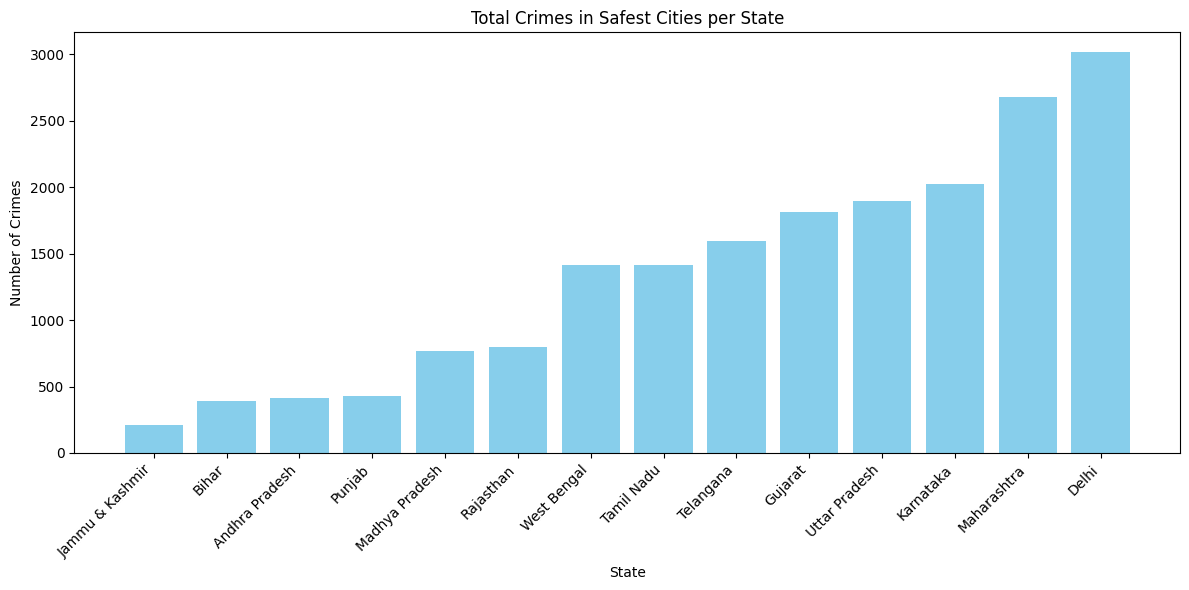

In [242]:
import matplotlib.pyplot as plt

# Plot total crimes per state
plt.figure(figsize=(12,6))
plt.bar(state_crimes['State'], state_crimes['Total_Crimes'], color='skyblue')
plt.title("Total Crimes in Safest Cities per State")
plt.xlabel("State")
plt.ylabel("Number of Crimes")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Step 5: Get Coordinates of Safest Cities

In [243]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="crime_analysis")

def get_coords(city):
    try:
        loc = geolocator.geocode(f"{city}, India")
        return loc.latitude, loc.longitude
    except:
        return None, None

safest_cities_per_state[['Latitude','Longitude']] = safest_cities_per_state['City'].apply(lambda x: pd.Series(get_coords(x)))


In [244]:
safest_cities_per_state

,State,City,Total_Crimes,Majority_Crime,Crime_Count,Latitude,Longitude
0,Andhra Pradesh,Visakhapatnam,410,IDENTITY THEFT,29,17.693553,83.292130
1,Bihar,Patna,389,SEXUAL ASSAULT,26,25.609324,85.123525
2,Delhi,Delhi,3014,DRUG OFFENSE,172,28.632803,77.219771
3,Gujarat,Rajkot,193,TRAFFIC VIOLATION,14,22.305326,70.802838
4,Gujarat,Surat,638,TRAFFIC VIOLATION,44,21.209489,72.831706
5,Gujarat,Ahmedabad,984,ASSAULT,75,23.021537,72.580057
6,Jammu & Kashmir,Srinagar,207,BURGLARY,15,34.074744,74.820444
7,Karnataka,Bangalore,2023,EXTORTION,119,12.976794,77.590082
8,Madhya Pradesh,Indore,380,EXTORTION,24,22.720362,75.868200
9,Madhya Pradesh,Bhopal,390,KIDNAPPING,27,23.258486,77.401989


In [245]:
import folium
#Use the average coordinates of all cities to center the map
lat_center = safest_cities_per_state['Latitude'].mean()
lon_center = safest_cities_per_state['Longitude'].mean()

# Create a map
m = folium.Map(location=[lat_center, lon_center], zoom_start=5)


In [246]:
for idx, row in safest_cities_per_state.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"{row['City']}, Total Crimes: {row['Total_Crimes']}\nMajor Crime: {row['Majority_Crime']}",
            icon=folium.Icon(color='green', icon='info-sign')
        ).add_to(m)
m
m.save("safest_cities_map.html")


In [247]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="crime_analysis")

def get_top_venues(city, radius=2000, top_n=10):
    # Get coordinates
    try:
        loc = geolocator.geocode(f"{city}, India")
        lat, lon = loc.latitude, loc.longitude
    except:
        return pd.Series(dtype=int)
    
    # Overpass API query to get amenities within radius
    overpass_url = "http://overpass-api.de/api/interpreter"
    query = f"""
    [out:json];
    node
      (around:{radius},{lat},{lon})
      [amenity];
    out;
    """
    
    try:
        response = requests.get(overpass_url, params={'data': query}, timeout=60)
        data = response.json()
    except:
        return pd.Series(dtype=int)
    
    # Extract amenity types
    venues = [element['tags'].get('amenity') 
              for element in data.get('elements', []) 
              if 'tags' in element]
    
    return pd.Series(venues).value_counts().head(top_n)


- around → searches within radius of city center. You can increase to 5000 (5 km) if the city is large.
- [amenity] → fetches nodes tagged as schools, restaurants, hospitals, banks, etc.
- value_counts().head(10) → gives top 10 venues.

In [248]:
city_list = df['City'].unique()  # Or safest_5_per_state['City']

city_venues = {}

for city in city_list:
    print(f"Processing {city}...")
    city_venues[city] = get_top_venues(city)


Processing Lucknow...
Processing Hyderabad...
Processing Kanpur...
Processing Delhi...
Processing Patna...
Processing Bangalore...
Processing Ludhiana...
Processing Vasai...
Processing Chennai...
Processing Nagpur...
Processing Indore...
Processing Mumbai...
Processing Surat...
Processing Visakhapatnam...
Processing Agra...
Processing Kolkata...
Processing Bhopal...
Processing Varanasi...
Processing Ahmedabad...
Processing Srinagar...
Processing Nashik...
Processing Faridabad...
Processing Jaipur...
Processing Pune...
Processing Ghaziabad...
Processing Meerut...
Processing Rajkot...
Processing Thane...
Processing Kalyan...


In [249]:
venues_df = pd.DataFrame(city_venues).fillna(0).astype(int).T
venues_df.head()

,atm,bank,bench,bicycle_repair_station,blood_bank,bus_station,cafe,childcare,cinema,clinic,...,pharmacy,place_of_worship,police,post_office,prep_school,restaurant,school,theatre,toilets,waste_basket
Lucknow,11,15,0,0,0,0,7,0,0,0,...,0,5,5,0,0,11,0,0,0,0
Hyderabad,6,6,0,0,0,0,11,84,0,15,...,0,29,5,0,0,13,0,0,0,0
Kanpur,5,1,0,0,0,2,0,0,0,7,...,1,4,0,0,0,4,4,0,0,0
Delhi,63,84,80,0,0,0,41,0,0,0,...,0,34,0,0,0,140,0,0,116,64
Patna,15,13,0,0,0,0,0,0,0,16,...,7,20,0,0,0,6,0,0,0,0


In [250]:
def return_most_common_venues(row, num_top_venues):
    return row.sort_values(ascending=False).index.values[0:num_top_venues]


In [251]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

# Columns: Neighborhood + 1st to 10th most common venue
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create DataFrame
cities_venues_sorted = pd.DataFrame(columns=columns)
cities_venues_sorted['City'] = venues_df.index  # cities as neighborhoods

# Fill top venues
for ind in np.arange(venues_df.shape[0]):
    cities_venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_df.iloc[ind, :], num_top_venues)

cities_venues_sorted.head()


,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Lucknow,hospital,bank,atm,restaurant,cafe,college,fuel,police,place_of_worship,fast_food
1,Hyderabad,childcare,place_of_worship,hospital,health_post,clinic,restaurant,cafe,bank,atm,police
2,Kanpur,hospital,clinic,atm,language_school,school,restaurant,place_of_worship,bus_station,pharmacy,bank
3,Delhi,restaurant,toilets,fast_food,bank,bench,waste_basket,atm,cafe,place_of_worship,drinking_water
4,Patna,hospital,fast_food,place_of_worship,clinic,atm,bank,dentist,pharmacy,doctors,restaurant


In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import folium

# Standardize data
scaler = StandardScaler()
venue_scaled = scaler.fit_transform(venues_df)

# K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
venues_df['Cluster'] = kmeans.fit_predict(venue_scaled)

In [253]:
print(venues_df['Cluster'])


Lucknow          3
Hyderabad        3
Kanpur           3
Delhi            2
Patna            3
Bangalore        2
Ludhiana         3
Vasai            3
Chennai          3
Nagpur           1
Indore           0
Mumbai           3
Surat            3
Visakhapatnam    3
Agra             3
Kolkata          3
Bhopal           1
Varanasi         3
Ahmedabad        3
Srinagar         3
Nashik           3
Faridabad        3
Jaipur           3
Pune             4
Ghaziabad        3
Meerut           3
Rajkot           3
Thane            1
Kalyan           3
Name: Cluster, dtype: int32


In [254]:
map_df = safest_cities_per_state.merge(venues_df['Cluster'], left_on='City', right_index=True, how='left')

# Create map centered on India
map_center = [20.5937, 78.9629]
m = folium.Map(location=map_center, zoom_start=5)

# Cluster colors
colors = ['red','blue','green','purple','orange']

for idx, row in map_df.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.CircleMarker(
            location=[row['Latitude'], row['Longitude']],
            radius=7,
            color=colors[row['Cluster']],
            fill=True,
            fill_color=colors[row['Cluster']],
            fill_opacity=0.7,
            popup=(f"{row['City']}, {row['State']}\n"
                   f"Total Crimes: {row['Total_Crimes']}\n"
                   f"Major Crime: {row['Majority_Crime']}\n"
                   f"Cluster: {row['Cluster']}")
        ).add_to(m)

# Display map
m

# If map does not render in VS Code:
m.save("clustered_cities_map.html")

In [255]:
venues_df.columns

Index(['atm', 'bank', 'bench', 'bicycle_repair_station', 'blood_bank',
       'bus_station', 'cafe', 'childcare', 'cinema', 'clinic', 'college',
       'community_centre', 'dentist', 'doctors', 'drinking_water',
       'events_venue', 'fast_food', 'fire_station', 'food_court', 'fountain',
       'fuel', 'health_post', 'hospital', 'ice_cream', 'language_school',
       'library', 'marketplace', 'parking', 'pharmacy', 'place_of_worship',
       'police', 'post_office', 'prep_school', 'restaurant', 'school',
       'theatre', 'toilets', 'waste_basket', 'Cluster'],
      dtype='object')

In [256]:
venues_df

,atm,bank,bench,bicycle_repair_station,blood_bank,bus_station,cafe,childcare,cinema,clinic,...,place_of_worship,police,post_office,prep_school,restaurant,school,theatre,toilets,waste_basket,Cluster
Lucknow,11,15,0,0,0,0,7,0,0,0,...,5,5,0,0,11,0,0,0,0,3
Hyderabad,6,6,0,0,0,0,11,84,0,15,...,29,5,0,0,13,0,0,0,0,3
Kanpur,5,1,0,0,0,2,0,0,0,7,...,4,0,0,0,4,4,0,0,0,3
Delhi,63,84,80,0,0,0,41,0,0,0,...,34,0,0,0,140,0,0,116,64,2
Patna,15,13,0,0,0,0,0,0,0,16,...,20,0,0,0,6,0,0,0,0,3
Bangalore,64,139,241,0,0,0,105,0,0,0,...,53,0,0,0,249,0,0,64,169,2
Ludhiana,0,4,0,0,5,0,0,0,0,15,...,11,5,0,0,5,0,0,0,0,3
Vasai,0,0,0,0,1,0,2,0,0,2,...,2,0,0,0,5,0,0,0,0,3
Chennai,38,36,0,0,0,0,28,0,0,28,...,17,0,0,0,69,10,0,0,0,3
Nagpur,13,12,0,0,0,0,0,0,7,22,...,11,6,0,0,9,0,0,0,0,1


In [257]:
# List of columns to keep after merge
columns_to_keep = ['State', 'City', 'Latitude', 'Longitude',
                   '1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue',
                   '4th Most Common Venue', '5th Most Common Venue', '6th Most Common Venue',
                   '7th Most Common Venue', '8th Most Common Venue', '9th Most Common Venue',
                   '10th Most Common Venue']

final_df = safest_cities_per_state.merge(cities_venues_sorted, on='City', how='left')

final_df = final_df[columns_to_keep]

final_df.head()


,State,City,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Andhra Pradesh,Visakhapatnam,17.693553,83.292130,bank,place_of_worship,pharmacy,bus_station,marketplace,fire_station,events_venue,cinema,post_office,hospital
1,Bihar,Patna,25.609324,85.123525,hospital,fast_food,place_of_worship,clinic,atm,bank,dentist,pharmacy,doctors,restaurant
2,Delhi,Delhi,28.632803,77.219771,restaurant,toilets,fast_food,bank,bench,waste_basket,atm,cafe,place_of_worship,drinking_water
3,Gujarat,Rajkot,22.305326,70.802838,hospital,bank,bus_station,place_of_worship,blood_bank,clinic,school,restaurant,police,fuel
4,Gujarat,Surat,21.209489,72.831706,hospital,clinic,atm,place_of_worship,fuel,bank,dentist,doctors,blood_bank,fast_food
